In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to your Excel file
file_path='security_checkpoint_data.xlsx'

# Define your mapping
lane_mapping = {
    '2018_02_23': 'o1',
    '2018_03_01': 'o2',
    '2018_03_10': 'o3',
    '2018_03_12': 'o4',
    '2018_03_31': 'o5',
    '2018_04_07': 'o6',
    '2018_04_15': 'o7',
    '2018_04_17a': 'o8',
    '2018_04_17b': 'o9',
    '2018_12_17a': 'n1',
    '2018_12_17b': 's1',
    '2018_12_18a': 'n2',
    '2018_12_18b': 's2'
}

# Load all sheets into a dictionary
sheets_dict = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Combine all DataFrames with mapped names
combined_df = pd.concat(
    [
        df.assign(sheet_name=lane_mapping.get(sheet_name, sheet_name))  # use original if not in mapping
        for sheet_name, df in sheets_dict.items()
    ],
    ignore_index=True
)

combined_df.head()

,Comments,Lane number,Date,business,senior,family,young,PRM,regular,Experience,...,Time Start WTMD check,Time End WTMD check,Time Start ETD check,Time End ETD check,Time Start Baggage reclaim,Time End Baggage reclaim,Group size,Time Start Baggage Check,Time End Baggage Check,sheet_name
0,"2x wtmd, shoes",3,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,50552.0,50732.0,2.0,NaN,NaN,o1
1,NaN,3,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,50601.0,50608.0,50610.0,50753.0,2.0,NaN,NaN,o1
2,NaN,3,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,50735.0,50814.0,2.0,NaN,NaN,o1
3,2x wtmd,3,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,50741.0,50748.0,50758.0,50859.0,2.0,NaN,NaN,o1
4,NaN,3,2018-02-23 00:00:00,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,51115.0,51213.0,1.0,NaN,NaN,o1


In [2]:
combined_df.columns

Index(['Comments', 'Lane number', 'Date', 'business', 'senior', 'family',
       'young', 'PRM', 'regular', 'Experience', 'Time Start Baggage drop off',
       'Number of boxes', 'Time End Baggage drop off', 'Time Start WTMD',
       'Time Start WTMD 2', 'Time Start WTMD 3', 'Time Start WTMD check',
       'Time End WTMD check', 'Time Start ETD check', 'Time End ETD check',
       'Time Start Baggage reclaim', 'Time End Baggage reclaim', 'Group size',
       'Time Start Baggage Check', 'Time End Baggage Check', 'sheet_name'],
      dtype='object')

In [3]:
combined_df.shape

(2405, 26)

In [4]:
# Group by 'sheet_name' and apply describe
grouped_stats = combined_df.groupby('sheet_name').describe()

# Display the result
print(grouped_stats)


            Lane number                                    business       ...  \
                  count mean  std  min  25%  50%  75%  max    count mean  ...   
sheet_name                                                                ...   
2018_12_06a        61.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     29.0  1.0  ...   
2018_12_06b        52.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0      3.0  1.0  ...   
n1                175.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     72.0  1.0  ...   
n2                321.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     62.0  1.0  ...   
o1                236.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     42.0  1.0  ...   
o2                151.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     63.0  1.0  ...   
o3                186.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      8.0  1.0  ...   
o4                162.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     22.0  1.0  ...   
o5                115.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      0.0  NaN  ...   
o6                138.0  3.0

In [5]:

missing_values = combined_df.isnull().sum()
print("Missing values per column:")
print(missing_values)



Missing values per column:
Comments                       1309
Lane number                       0
Date                              0
business                       1961
senior                         1875
family                         2166
young                          2033
PRM                            2380
regular                        1338
Experience                        2
Time Start Baggage drop off       1
Number of boxes                   2
Time End Baggage drop off         1
Time Start WTMD                   5
Time Start WTMD 2              2072
Time Start WTMD 3              2402
Time Start WTMD check          2191
Time End WTMD check            2192
Time Start ETD check           2092
Time End ETD check             2096
Time Start Baggage reclaim        9
Time End Baggage reclaim          9
Group size                        3
Time Start Baggage Check       2231
Time End Baggage Check         2236
sheet_name                        0
dtype: int64


In [6]:
categorical_cols = combined_df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(combined_df[col].value_counts())




Value counts for column: Comments
Comments
takes x-ray boxes with him                                            60
box away                                                              37
Reclaim outside queue                                                 36
takes x-ray boxes with her                                            24
boxes away                                                            24
                                                                      ..
mother + young child. etd; passenger + baggage                         1
2nd time wtmd (belt) 151542                                            1
ETD pax + luggage, reclaim largely outside queue                       1
Mum + kid (4 yo), WTMD twice (1819), reclaim largely outside queue     1
wtmd shoes (1047)                                                      1
Name: count, Length: 697, dtype: int64

Value counts for column: Date
Date
2018-12-18 00:00:00    596
2018-12-17 00:00:00    267
2018-02-23 00:00:00    2

In [7]:

combined_df['delta_time'] = combined_df['Time End Baggage reclaim']-combined_df['Time Start Baggage drop off']

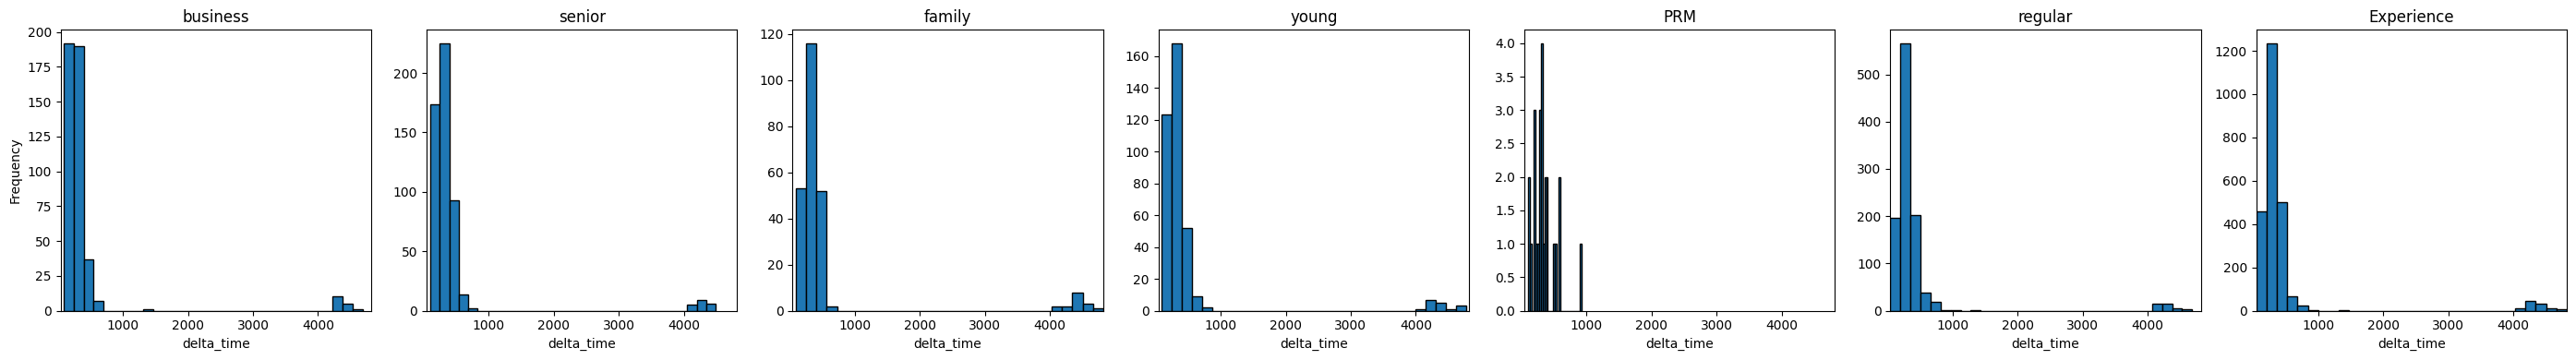

In [8]:
group_vars = ['business', 'senior', 'family', 'young', 'PRM', 'regular', 'Experience']

# Determine global x-axis range from all delta_time values
global_min = combined_df['delta_time'].min()
global_max = combined_df['delta_time'].max()

# Set up side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=len(group_vars), figsize=(4 * len(group_vars), 4), sharex=True)

# Loop through each variable and plot
for idx, var in enumerate(group_vars):
    ax = axes[idx]
    
    # Filter rows where this variable is not NaN
    subset = combined_df[combined_df[var].notna()]
    
    # Plot histogram of delta_time
    ax.hist(subset['delta_time'].dropna(), bins=30, edgecolor='black')
    ax.set_title(f"{var}")
    ax.set_xlabel("delta_time")
    if idx == 0:
        ax.set_ylabel("Frequency")
    ax.set_xlim(global_min, global_max)

plt.tight_layout()
plt.show()


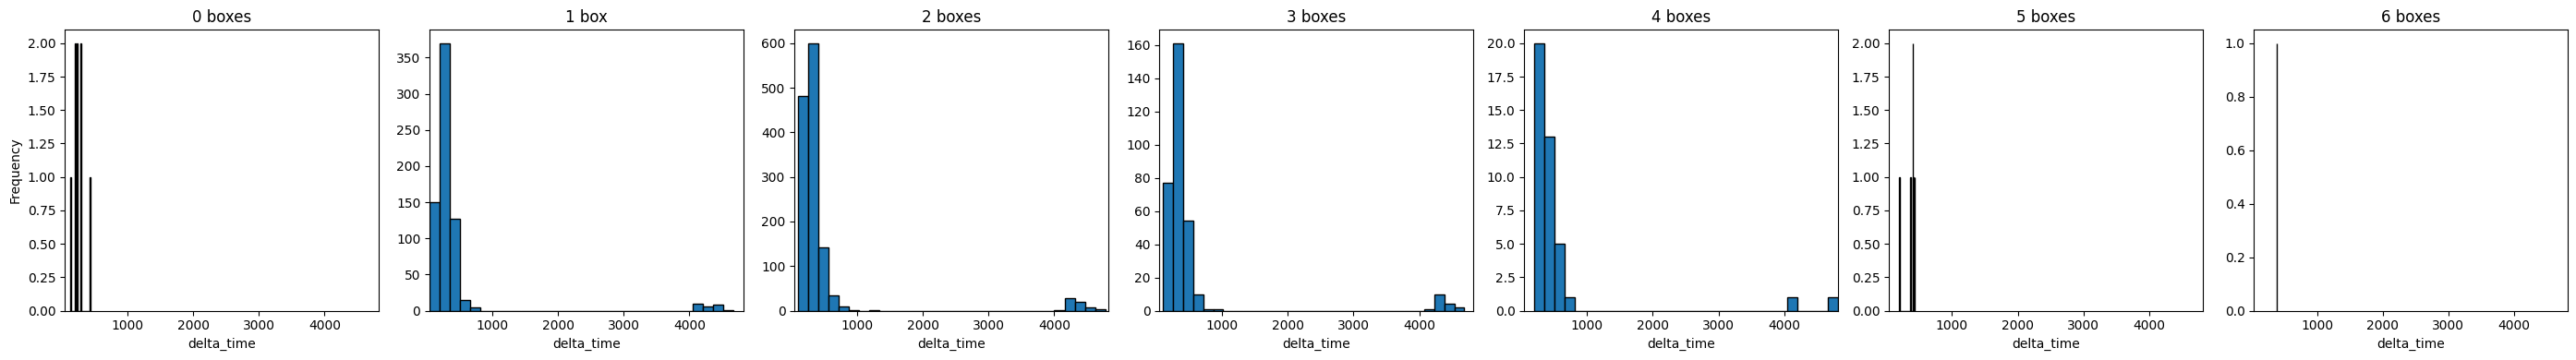

In [9]:
# Get sorted unique values of Number of boxes
box_values = sorted(combined_df['Number of boxes'].dropna().unique())

# Set up subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=len(box_values), figsize=(4 * len(box_values), 4), sharex=True)

# Global x-axis limits
global_min = combined_df['delta_time'].min()
global_max = combined_df['delta_time'].max()

for idx, box_val in enumerate(box_values):
    ax = axes[idx]
    
    # Filter by current number of boxes
    subset = combined_df[combined_df['Number of boxes'] == box_val]
    
    # Plot histogram
    ax.hist(subset['delta_time'].dropna(), bins=30, edgecolor='black')
    ax.set_title(f"{int(box_val)} box{'es' if box_val != 1 else ''}")
    ax.set_xlabel("delta_time")
    if idx == 0:
        ax.set_ylabel("Frequency")
    ax.set_xlim(global_min, global_max)

plt.tight_layout()
plt.show()


In [10]:
combined_df.columns


Index(['Comments', 'Lane number', 'Date', 'business', 'senior', 'family',
       'young', 'PRM', 'regular', 'Experience', 'Time Start Baggage drop off',
       'Number of boxes', 'Time End Baggage drop off', 'Time Start WTMD',
       'Time Start WTMD 2', 'Time Start WTMD 3', 'Time Start WTMD check',
       'Time End WTMD check', 'Time Start ETD check', 'Time End ETD check',
       'Time Start Baggage reclaim', 'Time End Baggage reclaim', 'Group size',
       'Time Start Baggage Check', 'Time End Baggage Check', 'sheet_name',
       'delta_time'],
      dtype='object')

In [11]:
combined_df.to_csv("processed_data.csv", index=False)
